In [32]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
import nltk
nltk.download('wordnet')
import scattertext as st
import spacy

import en_core_web_sm
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

/Users/divyasundar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/divyasundar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

ModuleNotFoundError: No module named 'scattertext'

In [33]:
def filler(text): 
    if text.dtype is pd.np.dtype(float): #if in the column the data type is a float/int, it replaces w an empty string
        return text.fillna('')
    elif text.dtype is pd.np.dtype(int): 
        return text.fillna('')
    else:
        return text.fillna('NA')

In [34]:
data=pd.read_csv('toxic_comments.csv', encoding='latin-1')

In [35]:
data.shape

(159571, 8)

In [36]:
data.head(6)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the tools well. Â Â· talk """,0,0,0,0,0,0


In [37]:
data= data.apply(filler)

/Users/divyasundar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/Users/divyasundar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  after removing the cwd from sys.path.


In [38]:
data.head(6)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the tools well. Â Â· talk """,0,0,0,0,0,0


In [39]:
data.comment_text[:6]

0    Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                         
1    D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)                                                                                                                                                                                                                                                           

In [40]:
data.comment_text=data.comment_text.str.replace('[^a-zA-Z]', ' ')

In [41]:
RE_PREPROCESS = r'\W+|\d+'  #raw string + alphanumeric character + one or more digits ( regular expressions)
data.comment_text = np.array( [ re.sub(RE_PREPROCESS, ' ', comment).lower() for comment in data.comment_text])

In [42]:
data.comment_text.head()

0    explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now                                                                                                                                                                                                                                                                                                                                                                   
1    d aww he matches this background colour i m seemingly stuck with thanks talk january utc                                                                                                                                                                                                                                                                                                          

In [43]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m seemingly stuck with thanks talk january utc,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it s listed in the relevant form eg wikipedia good article nominations transport,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember what page that s on,0,0,0,0,0,0


In [44]:
#STEP TWO: TOKENIZATION
data.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m seemingly stuck with thanks talk january utc,0,0,0,0,0,0


In [45]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
#WordNetLemmatizer returns the input word unchanged if it cannot be found in WordNet.
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
#TFidVectorizer converts a collection of raw documents to a matrix of TF-IDF features.

#“Term frequency–inverse document frequency, is a numerical statistic that is intended 
#to reflect how important a word is to a document in a collection or corpus.”
from sklearn import metrics

In [47]:
data.columns 

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [48]:
data['toxic'].value_counts()

0    144277
1    15294 
Name: toxic, dtype: int64

Text(0.5, 1.0, 'Toxic Comments')

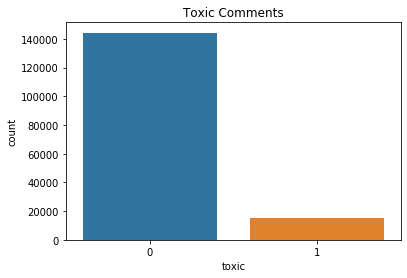

In [49]:
sns.countplot(x = "toxic", data = data)
plt.title('Toxic Comments')

In [50]:
#BALANCING DATA CODE

# shuffled_data = data.sample(frac=1,random_state=4)
# toxic_data = shuffled_data.loc[shuffled_data['toxic'] == 1]
# non_toxic_data = shuffled_data.loc[shuffled_data['toxic'] == 0].sample(n=16000,random_state=42)
# normalized_data = pd.concat([toxic_data, non_toxic_data])

# plt.figure(figsize=(8, 8))
# sns.countplot(x = "toxic", data = normalized_data)
# plt.title('Balanced Classes')
# plt.show()

In [51]:
#Code to strip data of other columns (only binary classes)
undersampled_data=data.sample(frac=0.2,random_state=2)
undersampled_data.drop(undersampled_data[(undersampled_data.toxic==0) & ((undersampled_data.severe_toxic==1) | 
(undersampled_data.obscene==1) | (undersampled_data.threat==1) | 
(undersampled_data.insult==1) | 
(undersampled_data.identity_hate==1))].index, inplace=True)
undersampled_data.drop(['id','severe_toxic','obscene','threat','insult','identity_hate'],axis=1, inplace=True)
from sklearn.model_selection  import train_test_split
X = undersampled_data.comment_text
y = undersampled_data['toxic']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,stratify=undersampled_data['toxic'],random_state=2,shuffle=True)

In [52]:
#undersampled_data
undersampled_data['toxic'].value_counts()
y_train

0    28651
1    3091 
Name: toxic, dtype: int64

100197    0
29182     0
14531     0
87132     0
118747    0
         ..
43165     0
149554    0
12914     0
155409    0
53161     0
Name: toxic, Length: 26980, dtype: int64

In [53]:
#STEP 3: VECTORIZATION
!pip install nltk
nltk.download('punkt')
!pip install scikit-learn

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/divyasundar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
vect=TfidfVectorizer(tokenizer=LemmaTokenizer(),stop_words='english',ngram_range=(1, 2),max_df=0.7,min_df=30)
vect.fit(X_train)

/Users/divyasundar/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/divyasundar/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.7, max_features=None,
                min_df=30, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<__main__.LemmaTokenizer object at 0x7fc13bb9c190>,
                use_idf=True, vocabulary=None)

In [55]:
train=vect.transform(X_train) # transforming from string to vector (train and test models)
test=vect.transform(X_test)

In [56]:
#STEP 4: TRAINING W BEST MODEL
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn import metrics

In [57]:
#Logistic Regression classification

# when true, yield x, else yield y, when there is a 1(toxic) in the column, the vector is the value 1
y_train=np.where(y_train==1, 1, 0)
y_test=np.where(y_test==1, 1, 0)

y_train.shape
y_test.shape

(26980,)

(4762,)

In [58]:
logreg = LogisticRegression(penalty='l2', C=0.2)
#fitting the logistical regression w x and y training subsets, and using the training subset to predict the testing
logreg.fit(train, y_train)
output_log = logreg.predict(test)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
y_true = y_test
y_pred = output_log
#the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9622696493632774, 0.6582888392355707, 0.722354965325448, None)

0.9332213355732886

In [60]:
#predicting the testing set using trained, and calculating the roc auc score, which is the area under the curve
y_pred_prob_log =logreg.predict_proba(test)[:, 1]
metrics.roc_auc_score(y_true, y_pred_prob_log)

0.9467565106464914

In [61]:
#Naive Bayes Classification
nb = MultinomialNB(alpha=0.3)
nb.fit(train, y_train)
output_nb = nb.predict(test)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [62]:
y_true = y_test
y_pred = output_nb
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9555266611845302, 0.7702720591774843, 0.8339552107531969, None)

0.9531709365812684

In [63]:
y_pred_prob_nb =nb.predict_proba(test)[:, 1]
metrics.roc_auc_score(y_true, y_pred_prob_nb)

0.951630469665121

In [64]:
#Random Forest Classification
rf = RandomForestClassifier(n_estimators = 20)
rf.fit(train,y_train)
output_rf = rf.predict(test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_true = y_test
y_pred = output_rf
precision_recall_fscore_support(y_true, y_pred, average='macro')
accuracy_score(y_true, y_pred)

(0.9003961985200017, 0.8092181006402337, 0.8473641010087061, None)

0.9523309533809324

In [66]:
y_pred_prob_rf =rf.predict_proba(test)[:, 1]

In [67]:
metrics.roc_auc_score(y_true, y_pred_prob_rf)

0.9271057308130485

In [68]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Receiver Operating Characteristic for Toxic classifier')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

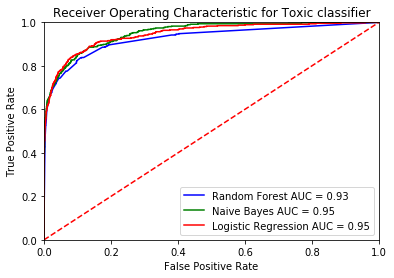

In [69]:
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred_prob_log)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_pred_prob_nb)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, y_pred_prob_rf)
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
plt.title('Receiver Operating Characteristic for Toxic classifier')

plt.plot(fpr3, tpr3, 'b', label = 'Random Forest AUC = %0.2f' % roc_auc3)
plt.plot(fpr2, tpr2, 'g', label = 'Naive Bayes AUC = %0.2f' % roc_auc2)
plt.plot(fpr1, tpr1, 'r', label = 'Logistic Regression AUC = %0.2f' % roc_auc1)


plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [70]:
#Both naive bayes and logistic regression are shown to have the best models shown by the accuracy scores. 


#STEP 5: TUNING FOR BEST ACCURACY
#hyperparameters are charcteristics of the model
nb.feature_count_.shape

(2, 4067)

In [71]:
tokens = vect.get_feature_names()

In [72]:
nontoxic_token = nb.feature_count_[0, :]
toxic_token = nb.feature_count_[1, :]

In [73]:
df = pd.DataFrame({'token': tokens, 'nontoxic_token':nontoxic_token, 'toxic_token':toxic_token})
df.head()

,token,nontoxic_token,toxic_token
0,ability,18.040060,1.364651
1,able,53.531644,2.592199
2,absence,6.364153,0.357750
3,absolute,6.716931,2.495802
4,absolutely,30.554525,3.417329


In [74]:
df['nontoxic_token'] = df.nontoxic_token / nb.class_count_[0]
df['toxic_token'] = df.toxic_token / nb.class_count_[1]

In [75]:
df['toxic_ratio'] = df.toxic_token / df.nontoxic_token

In [76]:
df.sort_values('toxic_ratio', ascending=False)[:10]

,token,nontoxic_token,toxic_token,toxic_ratio
2238,motherfucker,0.000000,0.005460,inf
1291,fag,0.000000,0.005593,inf
1433,fuckin,0.000000,0.005423,inf
1432,fucker,0.000000,0.005194,inf
2572,piece shit,0.000002,0.004704,2283.171739
1434,fucking,0.000031,0.033095,1082.869751
1431,fuck,0.000082,0.065123,794.245162
847,cunt,0.000021,0.013999,657.075599
414,bitch,0.000048,0.018191,377.351257
1292,faggot,0.000037,0.013199,359.468581


In [77]:
df.sort_values('toxic_ratio', ascending=True)[:10]

,token,nontoxic_token,toxic_token,toxic_ratio
3304,speaks,0.000337,0.0,0.0
1197,entry interested,0.000306,0.0,0.0
589,citation needed,0.000346,0.0,0.0
2369,october utc,0.000459,0.0,0.0
2367,oct,0.000455,0.0,0.0
1963,leader,0.000737,0.0,0.0
594,citing source,0.000266,0.0,0.0
3775,using article,0.000153,0.0,0.0
3554,test worked,0.000707,0.0,0.0
2366,occurred,0.000308,0.0,0.0


In [78]:
testdata=data.copy()

In [79]:
testdata.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my username hardcore metallica fan were reverted they weren t vandalisms just closure on some gas after i voted at new york dolls fac and please don t remove the template from the talk page since i m retired now,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m seemingly stuck with thanks talk january utc,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it s just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if no one else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up it s listed in the relevant form eg wikipedia good article nominations transport,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember what page that s on,0,0,0,0,0,0


In [80]:
rf.predict(vect.transform(["you are a moron"]))

array([1])

In [81]:
rf.predict(vect.transform(["you are my hero"]))

array([0])